# importing necessary libraries and reading data from excel file 

In [1]:

#importing libraries
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd
import seaborn as sns

#C:\Users\Krishnakumar\Data\hotel.ipynb

#importing dataset
df=pd.read_excel(r'C:\Users\Krishnakumar\Downloads\archive\Hotel Reservations Data.xlsx')
#Saving a backup of the data
df_bckup=df.copy()
# Capitalize the first letter and replacing space with underscore
for i in df:
    j=i.replace(" ","_")
    df.rename(columns={i:j.capitalize()},inplace=True)
df

C:\Users\Krishnakumar\AppData\Local\Temp\ipykernel_14920\1921948741.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Reservation_id,Guest_id,First_name,Last_name,Gender,Email,Phone,Nationality,Birthdate,Address,...,Payment_status,Special_requests,Reservation_source,Booking_date,Check-in_time,Check-out_time,Breakfast_included,Spa_package_included,Airport_pickup_included,Room_type_rate
0,1001,101,Laura,Weiss,Male,xconley@example.org,+1-777-290-9299x1874,Sweden,1990-06-20,194 Stewart Squares,...,Paid,They operation listen office no authority last...,Walk-in,2022-05-26,01:13:28,19:11:56,Yes,No,No,233
1,1002,102,Austin,Henderson,Female,williamaustin@example.org,4268908795,Cyprus,1999-07-22,31442 Morris Port Apt. 423,...,Pending,Agreement every land car.,Phone,2022-11-27,16:05:00,21:09:16,No,Yes,Yes,132
2,1003,103,Jamie,Smith,Male,benjaminporter@example.com,+1-563-234-8041x0677,Italy,1978-09-16,851 Ashley Junctions Apt. 370,...,Paid,Say exactly total field American.,Website,2022-07-22,18:54:33,23:34:07,No,Yes,No,88
3,1004,104,Brian,Erickson,Male,johnmelton@example.org,+1-377-838-9030x072,Slovakia,1958-02-21,7221 Lewis Burg,...,Pending,Operation better present effort teacher huge end.,Walk-in,2022-01-22,13:48:30,09:00:01,No,Yes,Yes,227
4,1005,105,Cristian,Taylor,Male,salazarkelly@example.com,5043212352,Norway,1984-11-30,9874 Melanie Ford Suite 715,...,Pending,Board little they really office.,Booking Platform,2022-06-15,15:32:38,23:48:24,Yes,No,Yes,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,37028,36128,Sean,Bowen,Female,newmansophia@example.org,001-271-583-7480x5708,Czech Republic,2004-06-10,0406 Carrie Extension Apt. 326,...,Paid,Sea onto thought affect think kid man site.,Website,2023-09-01,22:32:51,00:31:12,Yes,Yes,No,213
9970,37029,36129,Linda,Obrien,Female,keith37@example.com,355.806.5829x183,Russia,2001-02-25,7525 Brenda Plains Suite 230,...,Pending,Scientist happy throughout usually rate cup.,Website,2023-07-26,22:47:43,01:33:13,No,Yes,Yes,135
9971,37030,36130,Travis,Armstrong,Female,wjones@example.net,877.719.4173,Belgium,1994-05-05,53480 William Parkway Apt. 944,...,Pending,Next rate personal human himself clear issue.,Walk-in,2023-07-23,09:53:19,12:08:55,No,Yes,Yes,126
9972,37031,36131,Ralph,Lucas,Male,gonzalezangela@example.com,+1-640-980-2360x241,Malta,1970-10-17,89549 Angela Stream Apt. 725,...,Paid,Their word traditional professional man today ...,Phone,2023-01-26,16:41:16,07:02:17,No,No,Yes,85


# Getting the summary of datafields in the datasaet like index dtype and columns, non-null values and memory usage.

In [ ]:
df.info()

# finding the number of null values in the dataset


df.isnull().sum().sum()

# Comparing the modes of reservation in years 2022 and 2023

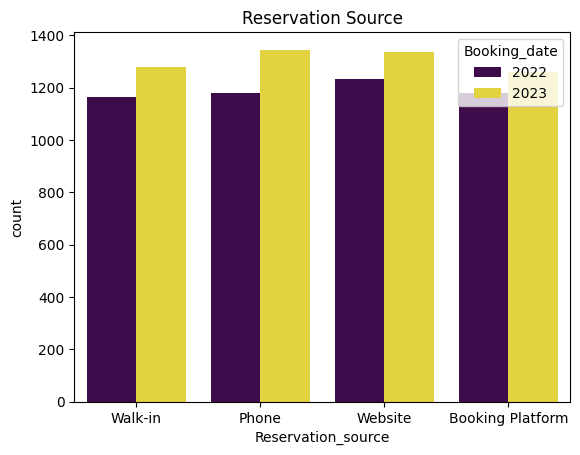

In [34]:

sns.countplot(x='Reservation_source',hue=df.Booking_date.dt.year,data=df,palette='viridis').set(title="Reservation Source")
mtp.show()

# conclusion: In both the year reservation through phone and website is more compared to other reservation sourse

# Calculating the amount paid and amount pending in the years 2022 and 2023

In [16]:
df.groupby(["Payment_status",df.Booking_date.dt.year,]) ['Total_amount'].sum()

Payment_status  Booking_date
Paid            2022             982482
                2023            1044271
Pending         2022             973276
                2023            1076944
Name: Total_amount, dtype: int64

# Finding the percentage of type of rooms booked

<Axes: >

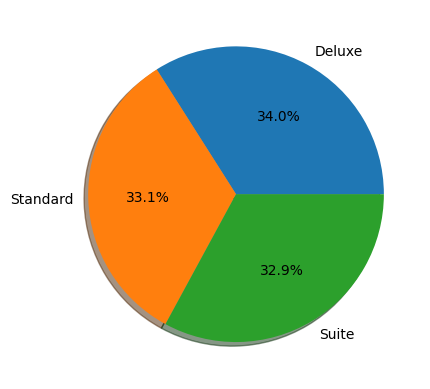

In [53]:
cols = sns.color_palette('tab10')[0:5]
df['Room_type'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols,label='')

# Conclusion: Deluxe type has more demand when comapred with the standard and suite.

# Calculating total number of booking from each country

In [9]:
guest_city = df['Country'].value_counts().reset_index()
guest_city.columns = ['Country', 'No of bookings']
guest_city

,Country,No of bookings
0,United States,798
1,Bulgaria,455
2,Romania,366
3,Italy,339
4,Serbia,336
5,Sweden,325
6,Spain,321
7,Belgium,315
8,Germany,312
9,Croatia,292


# Top 10 countries of booking the years 2022 and 2023

C:\Users\Krishnakumar\AppData\Local\Temp\ipykernel_18860\3352189313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country', order=country_order,palette='bright')


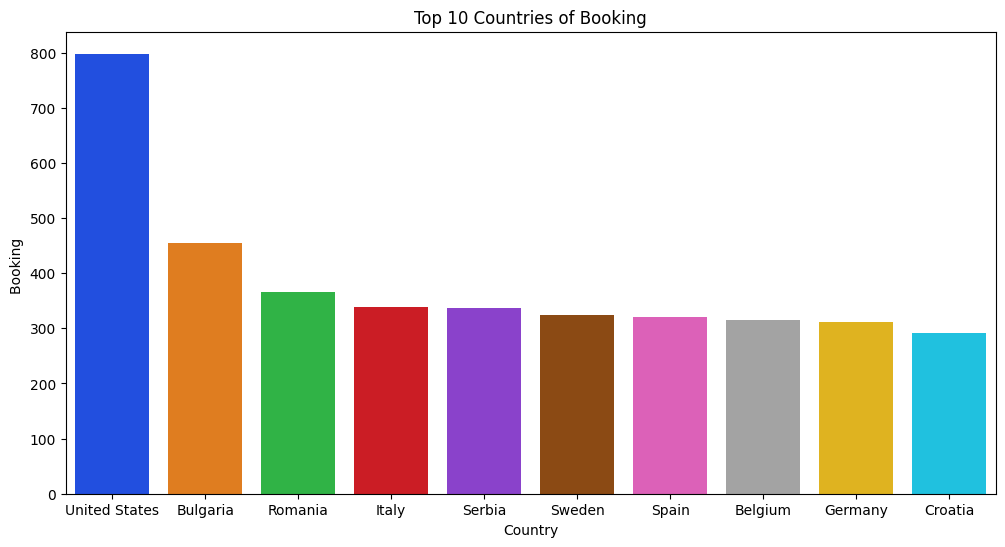

In [3]:
country_order = df['Country'].value_counts().head(10).index
mtp.figure(figsize=(12,6))
sns.countplot(data=df, x='Country', order=country_order,palette='bright')
mtp.title('Top 10 Countries of Booking')
mtp.xlabel('Country')
mtp.ylabel('Booking ');

# The U S has maximum number of booking

# Extracting the details of customers whose payment is pending

In [ ]:
df[df['Payment_status'] == 'Pending'][['First_name', 'Last_name','Phone']]

# Monthly wise booking of each year

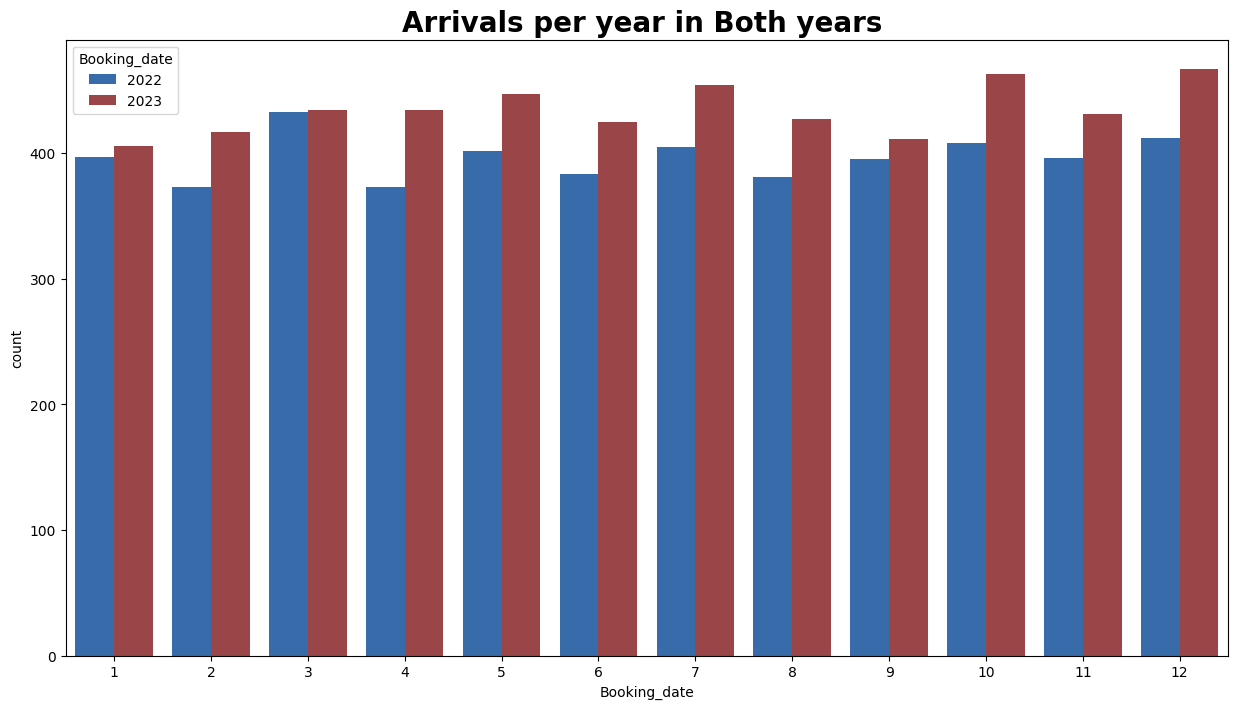

In [14]:

# number of booking monthwise in 2023 and 2024
mtp.figure(figsize=(15, 8))
sns.countplot(x=df.Booking_date.dt.month,hue=df.Booking_date.dt.year, data=df,palette='vlag')
mtp.title("Arrivals per year in Both years ",fontweight="bold", size=20)
mtp.show()

##### 

# The total number of booking has increased in 2023 when compared to 2022

# Plotting the price of each type of room in 2022 and 2023

In [ ]:

sns.barplot(x = 'Room_type', y = 'Room_type_rate', hue = df.Booking_date.dt.year, data = df,palette="bright")
mtp.show()

# There is no change in room rate in the year 2022 and 2023

# Plotting the people's demand for extra packages like breakfast,spa and airport pickup

In [ ]:
fig, axes = mtp.subplots(1, 3, figsize=(8, 4), sharey=True)
fig.suptitle('Additional Package')

# Breakfast
sns.barplot(ax=axes[0], y=df.Breakfast_included.index, x=df.Breakfast_included.values)
axes[0].set_title("Breakfast")

# Spa Package
sns.barplot(ax=axes[1], y=df.Spa_package_included.index, x=df.Spa_package_included.values)
axes[1].set_title("Spa")

# Airport Package
sns.barplot(ax=axes[2], y=df.Airport_pickup_included.index, x=df.Airport_pickup_included.values)
axes[2].set_title("Airport")

# The number of people preferring the special packages is almost equal to the number of people who is not preferring the special package